In [122]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

loading data set

In [123]:
dataframe = pd.read_csv('weatherHistory.csv')
dataframe.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [124]:
dataframe = dataframe.drop(['Formatted Date', 'Summary', 'Precip Type', 'Loud Cover', 'Daily Summary'], axis=1)
dataframe.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [125]:
new_columns = {'Temperature (C)':'x1', 'Apparent Temperature (C)':'y', 'Humidity':'x2', 'Wind Speed (km/h)':'x3',
          'Wind Bearing (degrees)':'x4', 'Visibility (km)':'x5', 'Pressure (millibars)':'x6'}

In [126]:
dataframe.rename(columns=new_columns, inplace=True)

In [127]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,96453.0,11.932678,9.551546,-21.822222,4.688889,12.0000,18.838889,39.905556
y,96453.0,10.855029,10.696847,-27.716667,2.311111,12.0000,18.838889,39.344444
x2,96453.0,0.734899,0.195473,0.000000,0.600000,0.7800,0.890000,1.000000
x3,96453.0,10.810640,6.913571,0.000000,5.828200,9.9659,14.135800,63.852600
x4,96453.0,187.509232,107.383428,0.000000,116.000000,180.0000,290.000000,359.000000
x5,96453.0,10.347325,4.192123,0.000000,8.339800,10.0464,14.812000,16.100000
x6,96453.0,1003.235956,116.969906,0.000000,1011.900000,1016.4500,1021.090000,1046.380000


In [128]:
dataframe.isna().sum()

x1    0
y     0
x2    0
x3    0
x4    0
x5    0
x6    0
dtype: int64

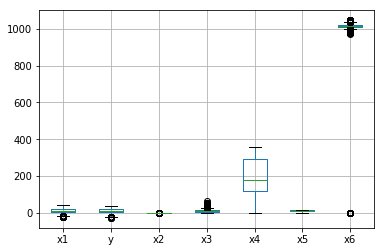

In [129]:
dataframe.boxplot()

In [130]:
dataframe = dataframe.head(500)

In [131]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,500.0,13.687300,4.558239,3.722222,10.15000,13.022222,17.244444,25.044444
y,500.0,13.300889,5.129404,1.494444,10.15000,13.022222,17.244444,25.044444
x2,500.0,0.742740,0.167093,0.320000,0.62000,0.760000,0.890000,1.000000
x3,500.0,10.194134,6.764105,0.000000,4.78975,9.177000,14.063350,32.167800
x4,500.0,190.222000,103.717111,0.000000,132.75000,169.000000,289.000000,359.000000
x5,500.0,10.435118,3.708072,0.289800,9.98200,10.819200,11.447100,15.874600
x6,500.0,1013.524640,4.040835,1003.570000,1011.34500,1013.910000,1016.520000,1021.010000


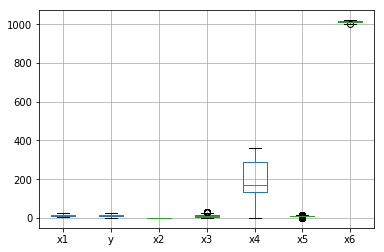

In [132]:
dataframe.boxplot()


In [133]:
# Separating the output and the parameters data frame
def separate(dataframe):
    output = dataframe.y
    return dataframe.drop('y', axis=1), output

In [134]:
# dataframe = dataframe[(dataframe >= dataframe.quantile(0.25)) & (dataframe<dataframe.quantile(0.75))]
# fucntion to get 
def remove_outlier(dataframe):
    dataframe = dataframe[np.abs(dataframe - dataframe.mean()) <= (3 * dataframe.std())]
    return dataframe

In [135]:
def split(dataframe):
    test_data = dataframe.tail(50).reset_index(drop=True)
    return dataframe.head(len(dataframe)-50), test_data

In [163]:
# using min max
def feature_scaling_column(dataframe, column):
    x_min = np.subtract(dataframe[column],dataframe[column].min())
    max_min = np.subtract(dataframe[column].max(),dataframe[column].min())
    dataframe[column] = np.divide(x_min,max_min)
    print("successfully scaled column ",column)
    return dataframe

In [164]:
Ypred = pd.Series(np.zeros(len(dataframe)))


In [165]:
dataframe = remove_outlier(dataframe)

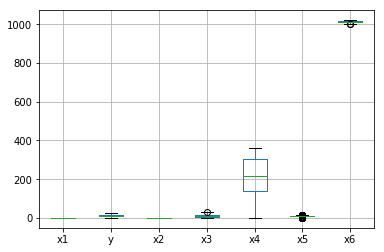

In [166]:
dataframe.boxplot()

In [167]:
dataframe.isna().sum()

x1    0
y     0
x2    0
x3    0
x4    0
x5    0
x6    0
dtype: int64

In [168]:
dataframe = dataframe.dropna()
dataframe = dataframe.reset_index(drop=True)

In [169]:
# fig = plt.figure()
# fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, ncols=1, figsize=(5, 10))
# s = np.array(np.random.rand(20))
# for i in range(20):
#     ax1.scatter(i,s[i])

# ax1.plot([0,3],[0,4])
# plt.show()

In [170]:
class Multi_Linear_Regression():
    
    
    def __init__(self):
        self.learning_rate = 0.001
        self.iteration = 10000
        self.ncols=6
        self.fig = plt.figure()
        self.fig, (self.ax1, self.ax2, self.ax3,self.ax4) = plt.subplots(nrows=4, ncols=1, figsize=(5, 10))
        
    def train(self, dataframe, output):
        weights = np.full(self.ncols,1.0)
        dframe_size = dataframe.shape[0]
        bais = 1.0

        # Ypred = (dataframe.x1*weight1 + dataframe.x2*weight2 + dataframe.x3*weight3+ dataframe.x4*weight4 + dataframe.x5*weight5 + bais)
        
        self.ax1.scatter(np.linspace(np.min(output),np.max(output),len(output)),output
                         , marker='+', color='g')
        self.ax1.set_title('points scarttered')
        
        for iterations in range(0, self.iteration):
            Ypred = self.classify(dataframe, weights,bais)
            diff = np.subtract(Ypred,output)
            # cost = sum(y^ -y)**2)/2m
            cost = np.divide(np.sum(np.power((diff),2)),(2*dframe_size))
            if(iterations%100==0):
                print('In training iteration: {}, cost {}, bais:{}, weights:{}'
                      .format(iterations, cost,bais,weights))
            if(Ypred.isna().sum()>=1 or output.isna().sum()>=1 or bais == (-np.inf)):
                print('In training iteration: {}, Ypred.isna().sum(): {}, output.isna().sum(): {}, bais:{}, weights:{}'.format(iterations,Ypred.isna().sum(),output.isna().sum(),bais,weights))
                print(Ypred)
                return weights, bais
            
            if(iterations%10==0):
                self.ax2.plot(iterations,cost, markersize=0.3, marker='x', color='r')
                self.ax2.set_title('iteration vs cost')
                self.ax3.plot(bais,cost, markersize=0.3, marker = '+', color='#42f48c')
                self.ax3.set_title('bais vs cost')
#             print('iteration {} diff{} '.format(iterations,np.sum(diff)))
            for counter1 in range(0, self.ncols):
                # w = w - @*1/m() sum(y^-y)x)
                weights[counter1] = np.subtract(weights[counter1]
                                                ,np.divide(
                                                    np.multiply(
                                                        self.learning_rate,
                                                            np.sum(
                                                                np.multiply(
                                                    diff,dataframe.iloc[:,counter1]))),dframe_size
                                                )
                                               )
            
            bais -= self.learning_rate*(np.sum(diff)/dframe_size)
            
        return weights, bais
        
    def classify(self, dataframe, weights, bais):
        Ypred = pd.Series(np.zeros(len(dataframe)))
        dframe_size = len(dataframe)
        for counter1 in range(0, dframe_size):
            for counter2 in range(0, self.ncols):
                Ypred[counter1] = np.add(np.multiply(dataframe.iloc[counter1, counter2],weights[counter2]),Ypred[counter1])
        Ypred = np.add(bais,Ypred)
        return Ypred
        
    def accuracy(self,Ypred, y_output):
        Ypred= np.divide(abs(np.subtract(Ypred,y_output)),y_output)
        self.ax4.scatter(Ypred,y_output, marker='+',color='g')
        plt.subplots_adjust(hspace=0.5, wspace = 0.5)
        plt.show()
        self.ax4.set_title("predicted values vs original output")
        error = abs(np.sum(Ypred))/len(Ypred)
        return (1-error)*100
                

In [171]:
def main(dataframe, test_data):
    dataframe, output = separate(dataframe)
    regression_object = Multi_Linear_Regression()
    # feature Scaling:
    weights, bais = regression_object.train(dataframe,output)
    print(weights,bais)
    test_data, output = separate(test_data)
    Ypred = regression_object.classify(test_data, weights, bais)
    print("Accuracy = ", regression_object.accuracy(Ypred,output)) 

In [172]:
# plt.plot(np.random.rand(20))

In [173]:
# np.add(4,dataframe)

In [174]:
dataframe, test_data = split(dataframe)

In [175]:
for item in dataframe:
    dataframe = feature_scaling_column(dataframe, item)

successfully scaled column  x1
successfully scaled column  y
successfully scaled column  x2
successfully scaled column  x3
successfully scaled column  x4
successfully scaled column  x5
successfully scaled column  x6


In [176]:
# from IPython.core.debugger import Tracer; Tracer()()
# dataframe.isnan().sum()
dataframe.head()

,x1,y,x2,x3,x4,x5,x6
0,0.329303,0.294402,0.828125,0.467540,0.699164,0.996901,0.666667
1,0.322622,0.286161,0.781250,0.472450,0.721448,0.996901,0.695502
2,0.323894,0.396135,0.828125,0.122204,0.568245,0.941116,0.713379
3,0.261534,0.220517,0.734375,0.466994,0.749304,0.996901,0.740484
4,0.288260,0.273373,0.734375,0.363339,0.721448,0.996901,0.746251


In [ ]:
main(dataframe,test_data)

In training iteration: 0, cost 7.02686847946339, bais:1.0, weights:[1. 1. 1. 1. 1. 1.]
In training iteration: 100, cost 4.00292906671455, bais:0.6754184752022033, weights:[0.84234806 0.7936317  0.87408106 0.80452624 0.78891929 0.82851577]
In training iteration: 200, cost 2.2843444651255895, bais:0.43090097229609875, weights:[0.72438736 0.63772849 0.7787317  0.65654004 0.62981895 0.69947377]
In training iteration: 300, cost 1.3075801570822752, bais:0.24673890043970148, weights:[0.63634178 0.51987216 0.70642892 0.54435876 0.5099019  0.60242356]
In training iteration: 400, cost 0.7523857728787334, bais:0.10807495765893516, weights:[0.57084163 0.4307012  0.65150151 0.45917538 0.4195211  0.52948712]
In training iteration: 500, cost 0.4367665922436033, bais:0.0037089826559579464, weights:[0.52233134 0.36315841 0.60967425 0.39435066 0.35140416 0.47472563]
In training iteration: 600, cost 0.2572970282722111, bais:-0.0748022529699315, weights:[0.48662288 0.31192367 0.57772423 0.34487957 0.30006

In [115]:
yd = pd.Series(dataframe.x1)

In [116]:
yd.head()

0   -0.855038
1   -0.880714
2   -0.875823
3   -1.115469
4   -1.012763
Name: x1, dtype: float64

In [117]:
dataframe.head()

,x1,y,x2,x3,x4,x5,x6
0,-0.855038,-2.697934,-9.462010,-1.612617,-1.893830,-2.908468,-244.053119
1,-0.880714,-2.702953,-9.613756,-1.616399,-1.894075,-2.915140,-244.059295
2,-0.875823,-2.701997,-9.584852,-1.615679,-1.894029,-2.913869,-244.058118
3,-1.115469,-2.748843,-11.001152,-1.650978,-1.896314,-2.976140,-244.115763
4,-1.012763,-2.728766,-10.394167,-1.635850,-1.895334,-2.949452,-244.091058


In [118]:
# import pandas as pd
# import numpy as np
# dataframe = pd.read_csv("weatherHistory.csv")
# X = dataframe.drop(columns="Apparent Temperature (C)")
# y = dataframe["Apparent Temperature (C)"]

In [119]:
# from sklearn.preprocessing import MinMaxScaler


In [120]:
# dataframe, output = separate(dataframe)

# dataframe.head()